In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

/opt/anaconda3/envs/python_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

In [3]:
df.job_posted_date = pd.to_datetime(df['job_posted_date'])

In [4]:
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [7]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [9]:
df_DA_US = df_DA_US.explode('job_skills')

In [12]:
df_DA_US_grouped = df_DA_US.groupby(by='job_skills')['salary_year_avg'].agg(['count','median'])

In [24]:
df_top_skills = df_DA_US_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [25]:
df_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [26]:
df_top_paying = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)

In [27]:
df_top_paying

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


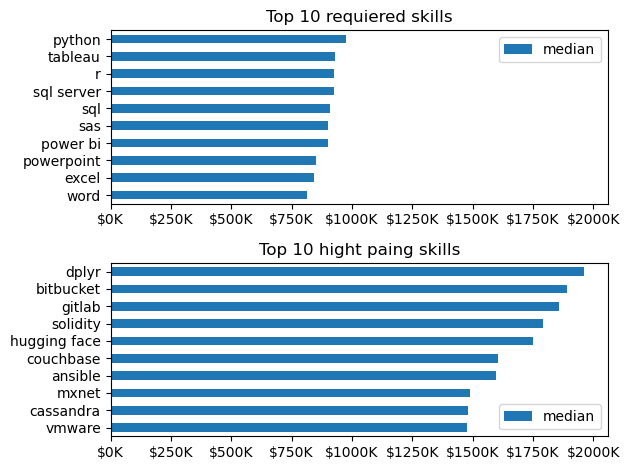

In [48]:
fig, ax = plt.subplots(2,1)

df_top_skills[::-1].plot(kind='barh', y='median', ax=ax[0])
#ci sono due modi per invertire l'ordine della barra: come d esempio qui sotto che l'ordine da su a sotto.
#1. [::-1]
#2. ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 requiered skills')


df_top_paying.plot(kind='barh', y='median', ax=ax[1])
ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 hight paing skills')

ax[0].set_xlim(ax[1].get_xlim())

plt.tight_layout()
plt.show()

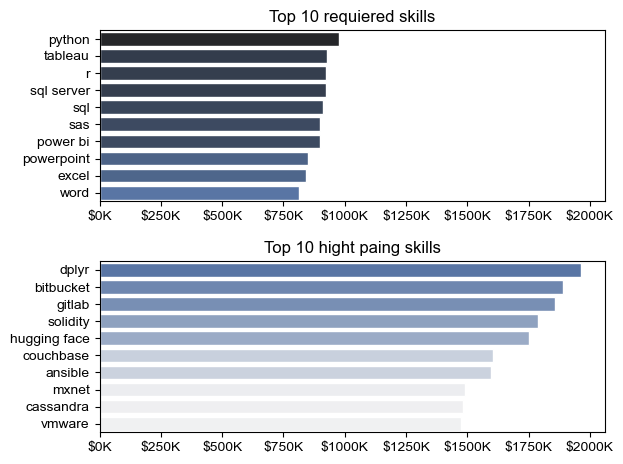

In [72]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")
#df_top_skills[::-1].plot(kind='barh', y='median', ax=ax[0])
#ci sono due modi per invertire l'ordine della barra: come d esempio qui sotto che l'ordine da su a sotto.
#1. [::-1]
#2. ax[0].invert_yaxis()
sns.barplot(df_top_skills, x='median', y=df_top_skills.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 requiered skills')
ax[0].legend().remove()



#df_top_paying.plot(kind='barh', y='median', ax=ax[1])
sns.barplot(df_top_paying, x='median', y=df_top_paying.index, ax=ax[1], hue='median', palette='light:b')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 hight paing skills')
ax[1].legend().remove()

ax[0].set_xlim(ax[1].get_xlim())

plt.tight_layout()
plt.show()

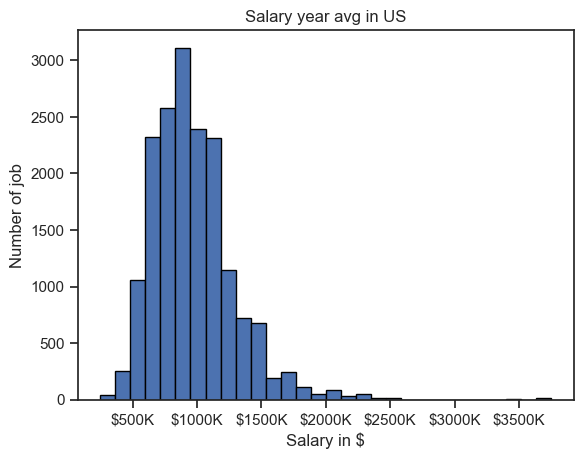

In [80]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Salary year avg in US')
plt.xlabel('Salary in $')
plt.ylabel('Number of job')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
plt.show()

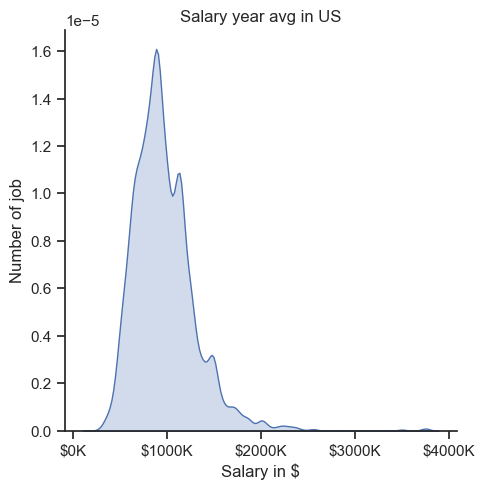

In [81]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Salary year avg in US')
plt.xlabel('Salary in $')
plt.ylabel('Number of job')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
plt.show()

In [82]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')]

In [84]:
df_US = df_US.dropna(subset='salary_year_avg')

In [104]:
df_final = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

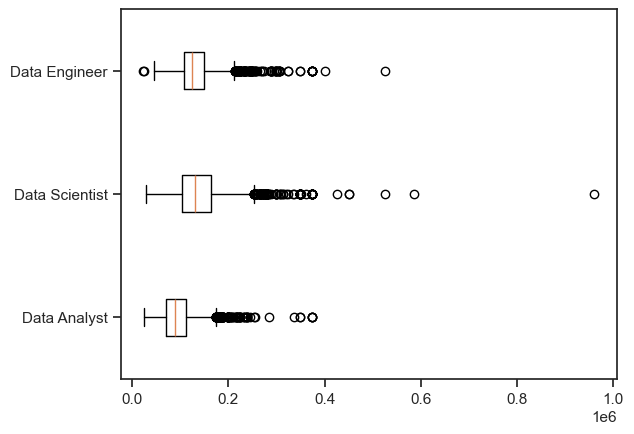

In [105]:
plt.boxplot(df_final, labels=job_titles, vert=False)
plt.show()

<Axes: xlabel='salary_year_avg', ylabel='job_title_short'>

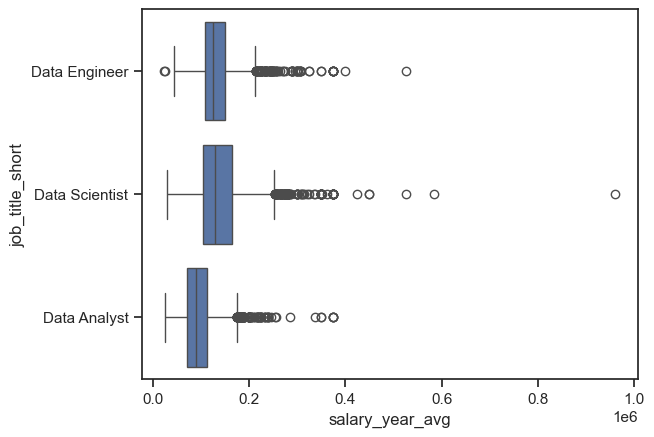

In [108]:
sns.boxplot(df_US, x='salary_year_avg', y='job_title_short')